#Task 1:
This dataset includes scores from three test scores of students at a (fictional) public school and a variety of personal and socio-economic factors that may have interaction effects upon them.
Column description:
1.  `Gender`: Gender of the student (male/female)
2.  `EthnicGroup`: Ethnic group of the student (group A to E)
3.  `ParentEduc`: Parent(s) education background (from some_highschool to master's degree)
4.  `LunchType`: School lunch type (standard or free/reduced)
5.  `TestPrep`: Test preparation course followed (completed or none)
6.  `ParentMaritalStatus`: Parent(s) marital status (married/single/widowed/divorced)
7.  `PracticeSport`: How often the student parctice sport (never/sometimes/regularly))
8.  `IsFirstChild`: If the child is first child in the family or not (yes/no)
9.  `NrSiblings`: Number of siblings the student has (0 to 7)
10. `TransportMeans`: Means of transport to school (schoolbus/private)
11. `WklyStudyHours`: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)
12. `MathScore`: math test score(0-100)
13. `ReadingScore`: reading test score(0-100)
13. `WritingScore`: writing test score(0-100)

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Download the dataset
Run the cell below

In [49]:
!gdown 1La5PlbYWPH1VyiE8Zq2BDAYWqtpd56Z2

Downloading...
From: https://drive.google.com/uc?id=1La5PlbYWPH1VyiE8Zq2BDAYWqtpd56Z2
To: /content/Expanded_data_with_more_features.csv
100% 2.91M/2.91M [00:00<00:00, 150MB/s]


#Read the dataset

In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [51]:
df=pd.read_csv("/content/Expanded_data_with_more_features.csv")

In [52]:
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


#Visualization

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'NrSiblings'}>],
       [<Axes: title={'center': 'MathScore'}>,
        <Axes: title={'center': 'ReadingScore'}>],
       [<Axes: title={'center': 'WritingScore'}>, <Axes: >]], dtype=object)

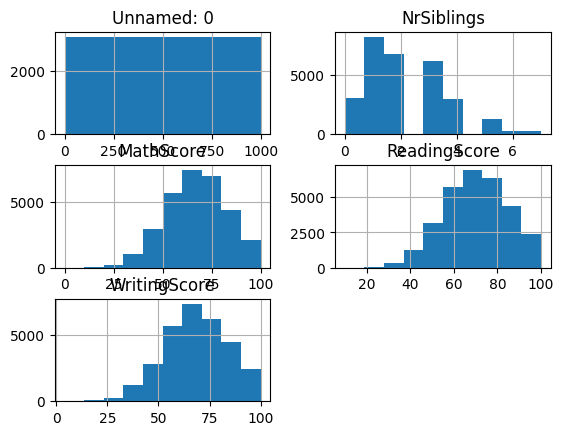

In [53]:
df.hist()

<Axes: >

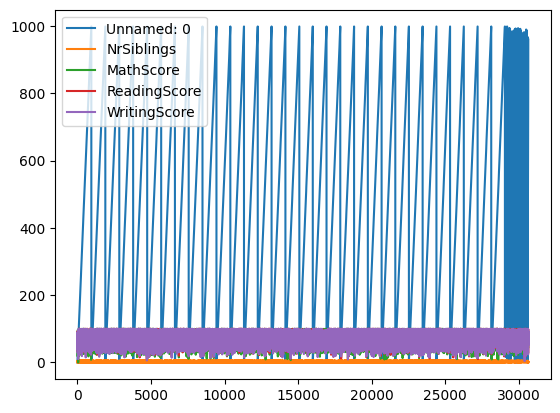

In [54]:
df.plot()

#Missing Values & Textual data

In [55]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [56]:
ds=df.copy()

In [57]:
ds.fillna(method="ffill")

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,group E,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [58]:
ds.EthnicGroup.value_counts()

group C    9212
group D    7503
group B    5826
group E    4041
group A    2219
Name: EthnicGroup, dtype: int64

In [59]:
ds.ParentEduc.value_counts()

some college          6633
high school           5687
associate's degree    5550
some high school      5517
bachelor's degree     3386
master's degree       2023
Name: ParentEduc, dtype: int64

In [60]:
ds.TestPrep.value_counts()

none         18856
completed     9955
Name: TestPrep, dtype: int64

In [61]:
category=['EthnicGroup','ParentEduc','ParentEduc','TestPrep','ParentMaritalStatus',	'PracticeSport',	'IsFirstChild'	,'TransportMeans']

In [62]:
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [63]:
emcoder=LabelEncoder()

In [64]:
for c in category:
  ds[c]=emcoder.fit_transform(ds[c])

In [65]:
ds

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,5,1,standard,1,1,1,1,3.0,1,< 5,71,71,74
1,1,female,2,4,standard,2,1,2,1,0.0,2,5 - 10,69,90,88
2,2,female,1,3,standard,1,2,2,1,4.0,1,< 5,87,93,91
3,3,male,0,0,free/reduced,1,1,0,0,1.0,2,5 - 10,45,56,42
4,4,male,2,4,standard,1,1,2,1,0.0,1,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,3,2,standard,1,2,2,0,2.0,1,5 - 10,59,61,65
30637,890,male,4,2,standard,1,2,1,0,1.0,0,5 - 10,58,53,51
30638,911,female,5,2,free/reduced,0,1,2,0,1.0,0,5 - 10,61,70,67
30639,934,female,3,0,standard,0,1,1,0,3.0,1,5 - 10,82,90,93


In [66]:
ds['Gender']=emcoder.fit_transform(ds['Gender'])


In [67]:
ds['LunchType']=emcoder.fit_transform(ds['LunchType'])


In [68]:
ds

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,0,5,1,1,1,1,1,1,3.0,1,< 5,71,71,74
1,1,0,2,4,1,2,1,2,1,0.0,2,5 - 10,69,90,88
2,2,0,1,3,1,1,2,2,1,4.0,1,< 5,87,93,91
3,3,1,0,0,0,1,1,0,0,1.0,2,5 - 10,45,56,42
4,4,1,2,4,1,1,1,2,1,0.0,1,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,0,3,2,1,1,2,2,0,2.0,1,5 - 10,59,61,65
30637,890,1,4,2,1,1,2,1,0,1.0,0,5 - 10,58,53,51
30638,911,0,5,2,0,0,1,2,0,1.0,0,5 - 10,61,70,67
30639,934,0,3,0,1,0,1,1,0,3.0,1,5 - 10,82,90,93


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'EthnicGroup'}>,
        <Axes: title={'center': 'ParentEduc'}>],
       [<Axes: title={'center': 'LunchType'}>,
        <Axes: title={'center': 'TestPrep'}>,
        <Axes: title={'center': 'ParentMaritalStatus'}>,
        <Axes: title={'center': 'PracticeSport'}>],
       [<Axes: title={'center': 'IsFirstChild'}>,
        <Axes: title={'center': 'NrSiblings'}>,
        <Axes: title={'center': 'TransportMeans'}>,
        <Axes: title={'center': 'MathScore'}>],
       [<Axes: title={'center': 'ReadingScore'}>,
        <Axes: title={'center': 'WritingScore'}>, <Axes: >, <Axes: >]],
      dtype=object)

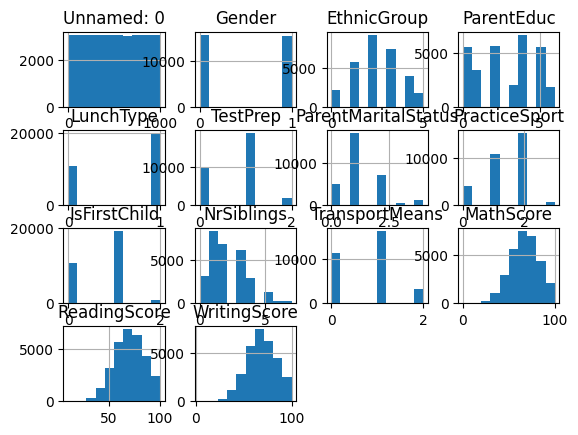

In [69]:
ds.hist()

In [70]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [71]:
ds.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup               0
ParentEduc                0
LunchType                 0
TestPrep                  0
ParentMaritalStatus       0
PracticeSport             0
IsFirstChild              0
NrSiblings             1572
TransportMeans            0
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [72]:
ds['NrSiblings']=df['NrSiblings'].fillna(method='ffill')

In [73]:
ds['WklyStudyHours']=df['WklyStudyHours'].fillna(method='ffill')

In [74]:
ds.isnull().sum()

Unnamed: 0             0
Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [75]:
ds

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,0,5,1,1,1,1,1,1,3.0,1,< 5,71,71,74
1,1,0,2,4,1,2,1,2,1,0.0,2,5 - 10,69,90,88
2,2,0,1,3,1,1,2,2,1,4.0,1,< 5,87,93,91
3,3,1,0,0,0,1,1,0,0,1.0,2,5 - 10,45,56,42
4,4,1,2,4,1,1,1,2,1,0.0,1,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,0,3,2,1,1,2,2,0,2.0,1,5 - 10,59,61,65
30637,890,1,4,2,1,1,2,1,0,1.0,0,5 - 10,58,53,51
30638,911,0,5,2,0,0,1,2,0,1.0,0,5 - 10,61,70,67
30639,934,0,3,0,1,0,1,1,0,3.0,1,5 - 10,82,90,93


In [76]:
ds.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

In [83]:
cl=['Gender',  'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans' , 'MathScore',
       'ReadingScore', 'WritingScore']

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
scaler=MinMaxScaler()

In [81]:
ds.drop(columns=['WklyStudyHours'])

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,MathScore,ReadingScore,WritingScore
0,0,0,5,1,1,1,1,1,1,3.0,1,71,71,74
1,1,0,2,4,1,2,1,2,1,0.0,2,69,90,88
2,2,0,1,3,1,1,2,2,1,4.0,1,87,93,91
3,3,1,0,0,0,1,1,0,0,1.0,2,45,56,42
4,4,1,2,4,1,1,1,2,1,0.0,1,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,0,3,2,1,1,2,2,0,2.0,1,59,61,65
30637,890,1,4,2,1,1,2,1,0,1.0,0,58,53,51
30638,911,0,5,2,0,0,1,2,0,1.0,0,61,70,67
30639,934,0,3,0,1,0,1,1,0,3.0,1,82,90,93


In [84]:
#for c in cl:
ds[cl]=scaler.fit_transform(ds[cl])

#Train - test split of the dataset (80:20 ratio)

In [86]:
X,Y=ds.drop(columns=['EthnicGroup']),ds['EthnicGroup']

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#Model training

In [91]:
X,Y=ds.drop(columns=['pulse','WklyStudyHours']),ds['pulse']

KeyError: ignored

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [93]:
from sklearn.tree import DecisionTreeRegressor

In [94]:
regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit(X_train, Y_train)

y_pred = regressor.predict(X_test)

ValueError: ignored

In [95]:
from sklearn.linear_model import LinearRegression


In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

In [ ]:
y_pred=model.prediction(X_test)

#Model evaluation

In [88]:
mean_absolute_error(Y_test, y_pred), mean_squared_error(Y_test, y_pred), r2_score(Y_test, y_pred)